Sycophancy in LLM - A Bayesian-Latent Model Simulation <br>
Partha Pratim Ray, 6 May, 2025, parthapratimray1986@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulation parameters
sigma_S_vals = np.array([0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0])
gammas = np.array([-1.0, -0.5, 0.1, 0.5, 1.0])
n_prompts = 100
n_cues = 3
n_styles = 2
n_trials = n_prompts * n_cues * n_styles

# Prepare storage
records = []

# Simulate data
for model_idx, gamma in enumerate(gammas):
    for sigma_S in sigma_S_vals:
        # Latent sycophancy scores
        S = np.random.normal(0, sigma_S, size=n_trials)
        # Baseline correctness
        y0 = np.random.binomial(1, 0.5, size=n_trials)
        # Cued correctness influenced by latent score and gamma
        probs = 1 / (1 + np.exp(-gamma * S))
        y1 = np.random.binomial(1, probs)
        # Flip indicator
        delta = y1 - y0
        
        # Compute metrics
        overall_rate = np.mean(delta != 0)
        prog_share = np.sum(delta == 1) / np.sum(delta != 0) if np.sum(delta != 0) > 0 else np.nan
        reg_share = np.sum(delta == -1) / np.sum(delta != 0) if np.sum(delta != 0) > 0 else np.nan
        avg_latent = np.mean(np.abs(S))
        
        records.append({
            'model': f'Model {model_idx}',
            'gamma': gamma,
            'sigma_S': sigma_S,
            'overall_rate': overall_rate,
            'prog_share': prog_share,
            'reg_share': reg_share,
            'avg_latent': avg_latent,
            'susceptibility': gamma
        })

df = pd.DataFrame(records)

# Display table for sigma_S = 1.0
df_sigma_1 = df[df['sigma_S'] == 1.0].reset_index(drop=True)
df_sigma_1.head()


,model,gamma,sigma_S,overall_rate,prog_share,reg_share,avg_latent,susceptibility
0,Model 0,-1.0,1.0,0.506667,0.506579,0.493421,0.789646,-1.0
1,Model 1,-0.5,1.0,0.470000,0.485816,0.514184,0.783494,-0.5
2,Model 2,0.1,1.0,0.505000,0.435644,0.564356,0.809976,0.1
3,Model 3,0.5,1.0,0.475000,0.519298,0.480702,0.791206,0.5
4,Model 4,1.0,1.0,0.511667,0.491857,0.508143,0.753237,1.0


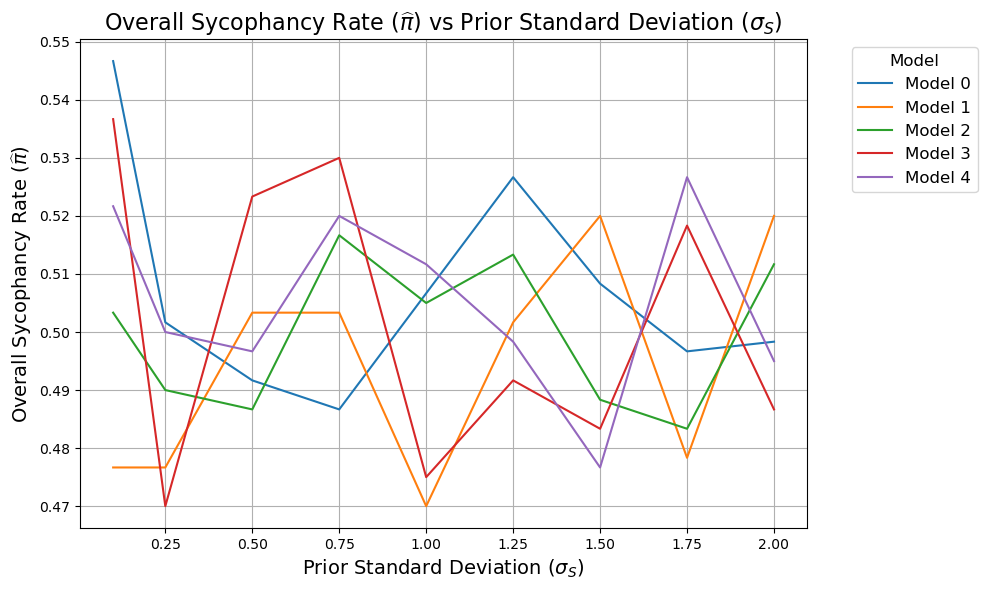

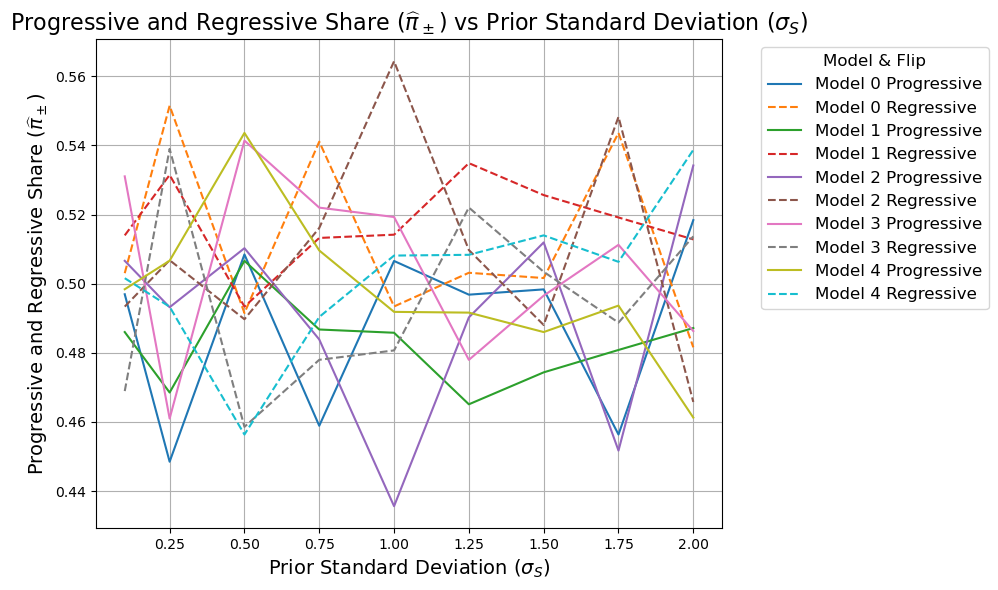

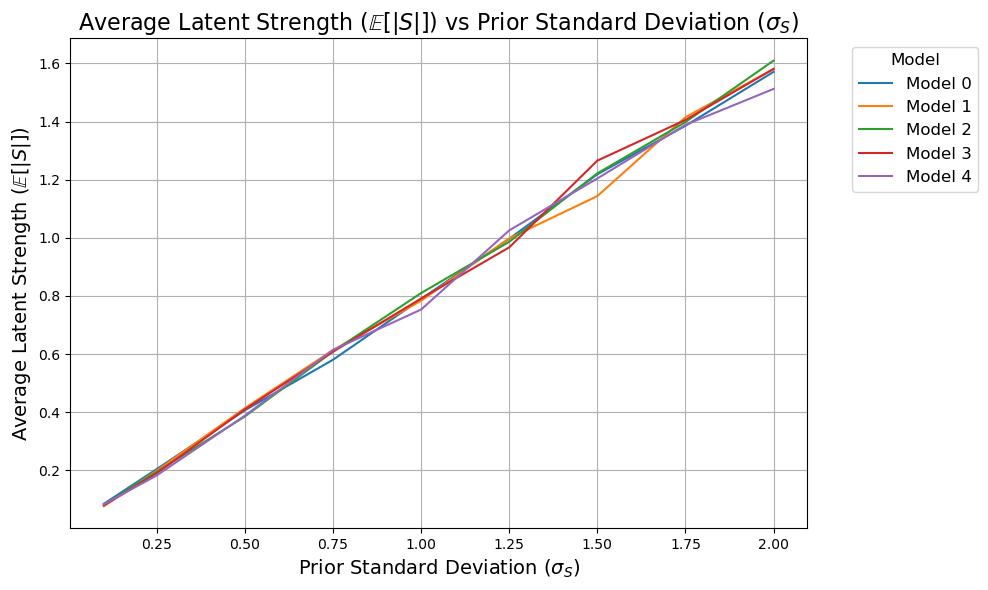

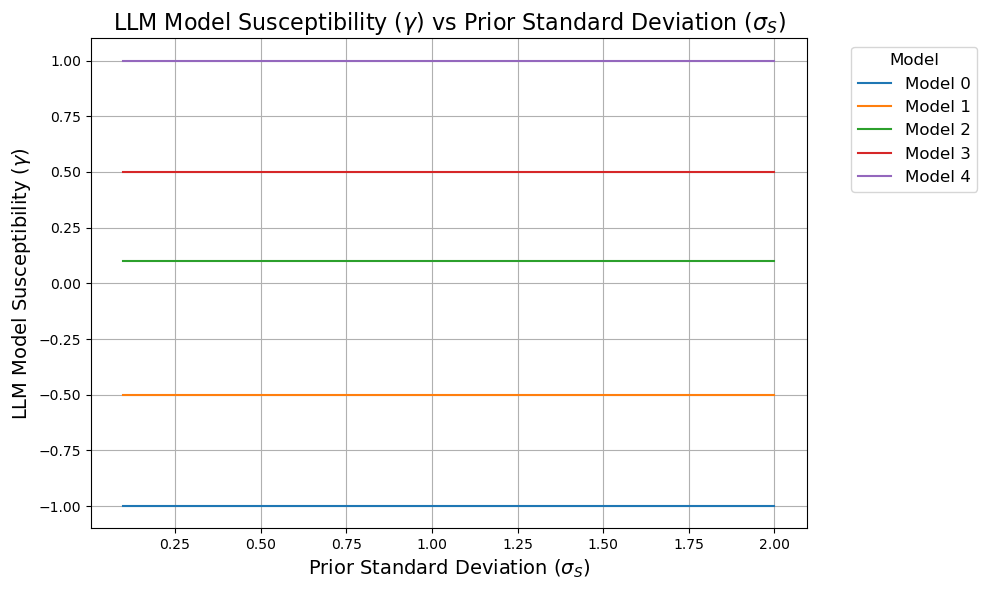

In [3]:
import matplotlib.pyplot as plt

# Define font sizes
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12

# Plot 1: Overall Sycophancy Rate vs Prior Standard Deviation σ_S
plt.figure(figsize=(10, 6))
for model_name, group in df.groupby('model'):
    plt.plot(group['sigma_S'], group['overall_rate'], label=model_name)
plt.title("Overall Sycophancy Rate ($\widehat\pi$) vs Prior Standard Deviation ($\sigma_S$)", fontsize=title_fontsize)
plt.xlabel("Prior Standard Deviation ($\sigma_S$)", fontsize=label_fontsize)
plt.ylabel("Overall Sycophancy Rate ($\widehat\pi$)", fontsize=label_fontsize)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Model", fontsize=legend_fontsize, title_fontsize=legend_fontsize)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Progressive vs Regressive Share
plt.figure(figsize=(10, 6))
for model_name, group in df.groupby('model'):
    plt.plot(group['sigma_S'], group['prog_share'], label=f"{model_name} Progressive")
    plt.plot(group['sigma_S'], group['reg_share'], linestyle='--', label=f"{model_name} Regressive")
plt.title("Progressive and Regressive Share ($\widehat{\pi}_\pm$) vs Prior Standard Deviation ($\sigma_S$)", fontsize=title_fontsize)
plt.xlabel("Prior Standard Deviation ($\sigma_S$)", fontsize=label_fontsize)
plt.ylabel("Progressive and Regressive Share ($\widehat{\pi}_\pm$)", fontsize=label_fontsize)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Model & Flip", fontsize=legend_fontsize, title_fontsize=legend_fontsize)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Average Latent Strength vs σ_S
plt.figure(figsize=(10, 6))
for model_name, group in df.groupby('model'):
    plt.plot(group['sigma_S'], group['avg_latent'], label=model_name)
plt.title("Average Latent Strength ($\mathbb{E}[|S|]$) vs Prior Standard Deviation ($\sigma_S$)", fontsize=title_fontsize)
plt.xlabel("Prior Standard Deviation ($\sigma_S$)", fontsize=label_fontsize)
plt.ylabel("Average Latent Strength ($\mathbb{E}[|S|]$)", fontsize=label_fontsize)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Model", fontsize=legend_fontsize, title_fontsize=legend_fontsize)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 4: Model Susceptibility vs σ_S
plt.figure(figsize=(10, 6))
for model_name, group in df.groupby('model'):
    plt.plot(group['sigma_S'], group['susceptibility'], label=model_name)
plt.title("LLM Model Susceptibility ($\gamma$) vs Prior Standard Deviation ($\sigma_S$)", fontsize=title_fontsize)
plt.xlabel("Prior Standard Deviation ($\sigma_S$)", fontsize=label_fontsize)
plt.ylabel("LLM Model Susceptibility ($\gamma$)", fontsize=label_fontsize)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Model", fontsize=legend_fontsize, title_fontsize=legend_fontsize)
plt.grid(True)
plt.tight_layout()
plt.show()
